<a href="https://colab.research.google.com/github/Rishikr15/Supervised-ML-Algorithms/blob/main/Knn_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install --upgrade matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Importing Necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


**Dataset** **Loading**

In [5]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

**Dataset Visualization**

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.shape

(400, 5)

#EDA

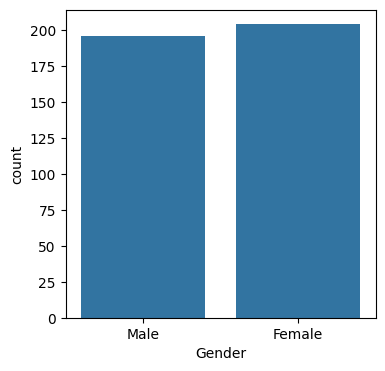

In [8]:
ax = plt.subplots(figsize=(4, 4))
sns.countplot(x=df['Gender'])
plt.show()

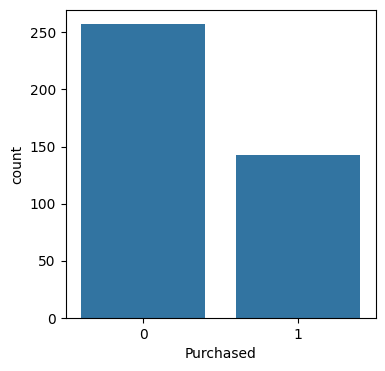

In [9]:
x = plt.subplots(figsize=(4, 4))
sns.countplot(x=df['Purchased'])
plt.show()

In [10]:
#Feature Extraction

X = df.iloc[:,[1,2,3]].values
y = df.iloc[:,4].values

In [11]:
#Use LabelEncodr for 'Gender' as it is non-numeric
label_encoder = LabelEncoder()
X[:,0] = label_encoder.fit_transform(X[:,0])

In [12]:
#Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#Feature scaling(important for KNN algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Create a KNN classifier with a specified value of K
k_value = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k_value)


In [15]:
#Fit the model to the training data
knn_classifier.fit(X_train,y_train)


KNeighborsClassifier()

In [16]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [17]:
#Evaluate the performance of the classifer
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

KNN Accuracy: 0.925
KNN Confusion matrix: 
[[48  4]
 [ 2 26]]
KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



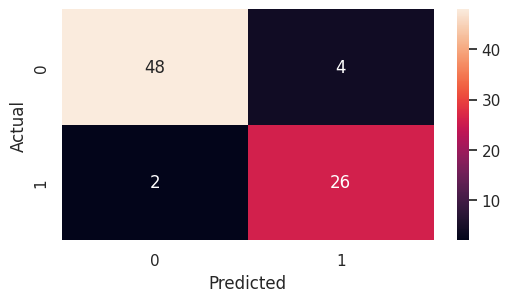

In [18]:
# Print the results
print(f'KNN Accuracy: {accuracy}')
print(f'KNN Confusion matrix: \n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'KNN Classification Report: \n{class_report}')

In [19]:
#Predict whether a targeted audience or person will purchase the product or not
new_data = np.array([[0,30,50000]])
predicted_purchase = knn_classifier.predict(scaler.transform(new_data))

#Print the predicted outcome
if predicted_purchase[0] == 1:
    print("The targeted audience will purchase the product.")
else:
    print("The person will not purchase the product.")

The person will not purchase the product.


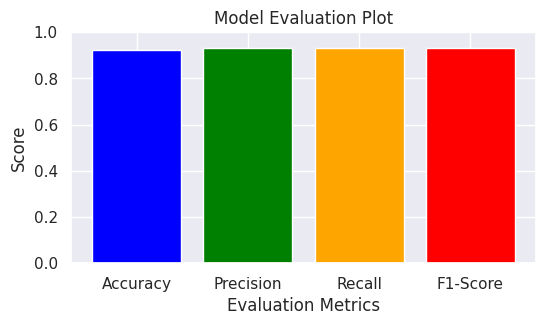

In [21]:
#Output Visualization
accuracy = 0.925
precision = 0.93
recall = 0.93
f1_score = 0.93

metrics_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metriced_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_name,metriced_values,color=['blue','green','orange','red'])
plt.ylim([0,1])
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

In [26]:
#10-fold Cross-Validation

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = make_scorer(accuracy_score)
cv_results = cross_val_score(knn_classifier, X, y, cv=cv, scoring=scoring)

print("Cross-Validation Accuracy:")
print("Individual Accuracies",cv_results)
print("Average Cross-Validation Accuracy:", np.mean(cv_results))

Cross-Validation Accuracy:
Individual Accuracies [0.675 0.8   0.775 0.9   0.8   0.75  0.925 0.85  0.75  0.8  ]
Average Cross-Validation Accuracy: 0.8025


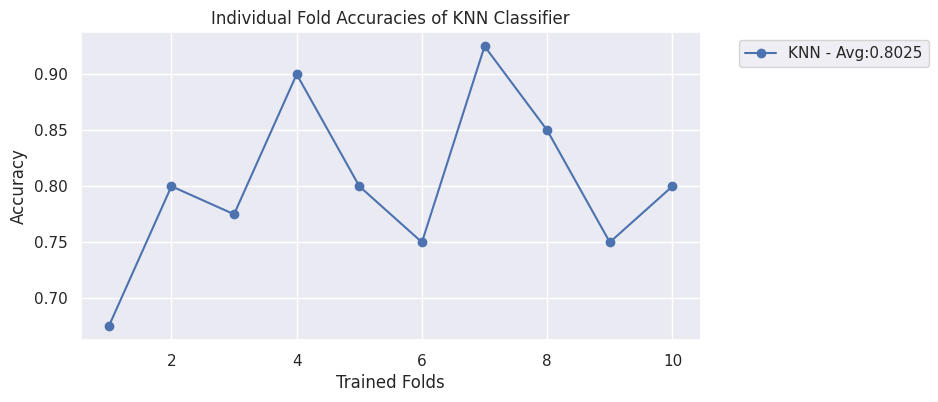

In [31]:
#Cross-Validation Result Visualization using Bar Plot

model = ['KNN']
accuracies = {
    'KNN': [0.675,0.8,0.775, 0.9, 0.8,0.75,0.925,0.85,0.75,0.8]
}
plt.figure(figsize=(8, 4))
for model in model:
  plt.plot(range(1,11),accuracies[model],marker='o',label=f'{model} - Avg:{sum(accuracies[model])/10:.4f}')

plt.title('Individual Fold Accuracies of KNN Classifier')
plt.xlabel('Trained Folds')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


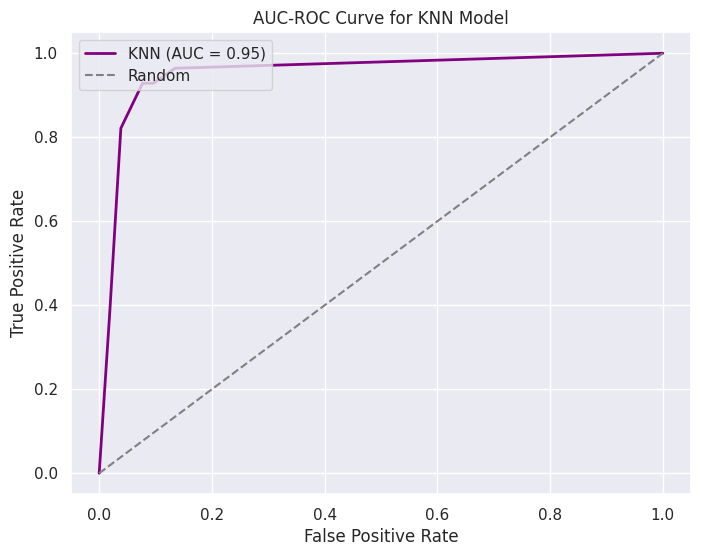

In [37]:
#ROC CURVE Plotting for the baove KNN model

from sklearn.metrics import roc_curve, auc
label_counter = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

knn_prediction_scores = knn_classifier.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, thresholds = roc_curve(y_test_binary, knn_prediction_scores)
knn_roc_auc = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

plt.plot(knn_fpr, knn_tpr, color='purple',lw = 2,label=f'KNN (AUC = {knn_roc_auc:.2f})')

plt.plot([0,1] ,[0,1] ,linestyle='--', color='gray',label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for KNN Model')
plt.legend(loc='upper left')
plt.show()




